In [7]:
#importing dependencies for data wrangling
import pandas as pd
import numpy as np

In [65]:
# importing modules for data visualization
import matplotlib.pyplot as plt
from mglearn.plot_helpers import  cm2

In [90]:
# importing machine learning modules
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, learning_curve, KFold

In [85]:
from sklearn.datasets import load_breast_cancer
from mglearn.datasets import load_extended_boston

Linear Regression

### Creating a synthetic dataset using sklearn for Linear Regression

##### This function will generate synthetic data for us to use further down the line for building our regression model. We will use a scatterplot for visualization

In [5]:
def make_wave(n_samples=100):
    # generating the data 
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4*x)+x)
    y = (y_no_noise + rnd.normal(size=len(x)))/2

    return x.reshape(-1,1), y

In [12]:
X, y = make_wave(60)

##### Analysis and visualization

In [13]:
df_x = pd.DataFrame(X)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
dtypes: float64(1)
memory usage: 612.0 bytes


In [14]:
df_y = pd.DataFrame(y)
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
dtypes: float64(1)
memory usage: 612.0 bytes


###### we observe there are two variable for a feature and target valuse

X.shape: (60, 1)


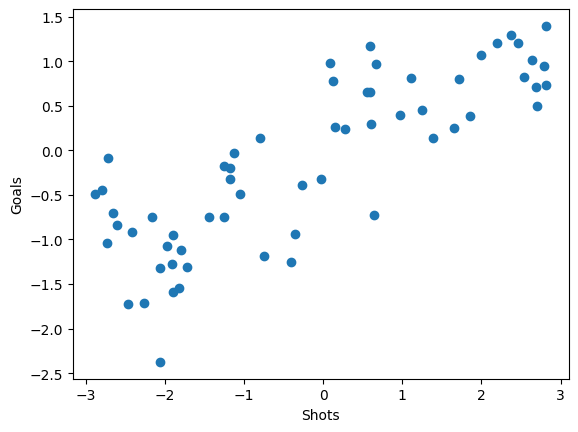

In [15]:
plt.plot(X, y, 'o')
plt.xlabel("Shots")
plt.ylabel("Goals")
print("X.shape: {}". format(X.shape))

###### From the visualiztion we can observe the points follow a specific pattern we can be sure that as as the number of the shots increases the goals will also increase

### Applying the linear regression algorithm 

In [35]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
# Initializing the model to 3 neighbors
lr = LinearRegression()

In [37]:
#Fitting the model with data
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
# Making predictions
print("Test set predictions: {}". format(lr.predict(X_test)))

Test set predictions: [-0.81274146  0.79990117 -0.47984962  0.22771528  1.22778333  0.59749174
  1.21645044 -1.2219042  -1.01841511 -0.5677658  -0.92839354 -1.28718838
  0.26779873 -0.02988867  1.17208529]


In [48]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge.score(X_train, y_train)))

Test set R^2: 0.69
Training set R^2: 0.66


###### We can observe that the r squared value of the model is 0.69

### Visualizing the predictions

In [29]:
def plot_knn_regression(n=1):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    # print("w[0]: %f b: %f" % (lr.coef_, lr.intercept_))

    plt.figure(figsize=(8,8))
    plt.plot(line, lr.predict(line))
    plt.plot(X, y, 'o', c=cm2(0))
    ax = plt.gca()
    
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    
    ax.set_ylim(-3, 3)
    ax.legend(["model", "training data"], loc="best")
    ax.grid(True)
    ax.set_aspect('equal')

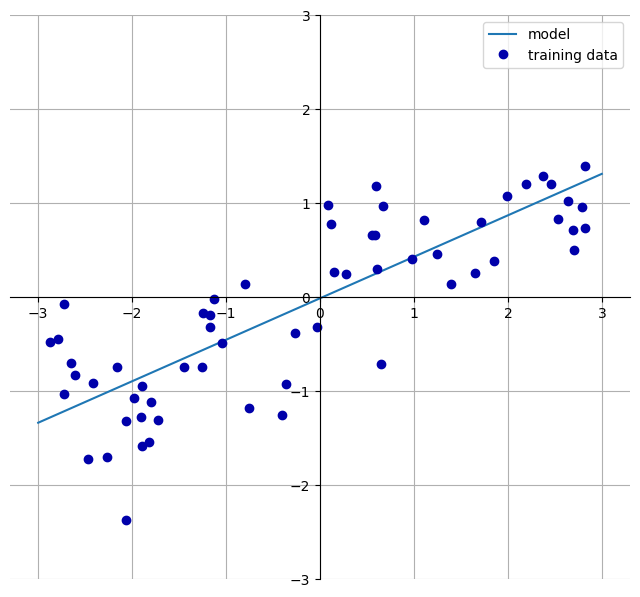

In [30]:
plot_knn_regression()

- ##### From the above graph we observe that the line of regresion cuts through the datapoint in order to maintain a least square 

### Ridge Regression 

-  ##### Ridge regression is similar to linear regression 
-  ##### The only difference is that the weight are calculated by generalization
-  ##### This means that bringing most values to as close as possible to zero so that they don't affect the model significantly
-  ##### Ridge regression uses L2 regularization

#### Applying the ridge regression algorithm 

In [78]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [43]:
# Initializing the model to 3 neighbors
ridge = Ridge()

In [45]:
#Fitting the model with data
ridge.fit(X_train, y_train)

Ridge()

In [46]:
# Making predictions
print("Test set predictions: {}". format(ridge.predict(X_test)))

Test set predictions: [-0.80774738  0.79328599 -0.477252    0.22521921  1.21808786  0.59233369
  1.20683656 -1.21396459 -1.0119404  -0.56453527 -0.92256689 -1.2787788
  0.2650141  -0.03053027  1.16279079]


In [47]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(ridge.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge.score(X_train, y_train)))

Test set R^2: 0.70
Training set R^2: 0.66


-  ##### The training set score of the ridge is less than linear regression while the test score is higher
-  ##### That means the model generalises better on new data
-  ##### This is the type of behaviour we want for our model 

#### Visualizing the ridge regression algorithm 

In [79]:
# Initializing the model to 3 neighbors
lr = LinearRegression()

In [81]:
#Fitting the model with data
lr.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lr.score(X_train, y_train)))

Test set R^2: 0.67
Training set R^2: 0.79


In [70]:
# Initializing the model to 3 neighbors
ridge = Ridge().fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(ridge.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge.score(X_train, y_train)))

Test set R^2: 0.70
Training set R^2: 0.75


In [71]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge10.score(X_train, y_train)))

Test set R^2: 0.68
Training set R^2: 0.73


-  ##### Increaing the alpha forces coefficients towards zero, this decreases training set score but helps with generalization

In [72]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge01.score(X_train, y_train)))

Test set R^2: 0.71
Training set R^2: 0.77


- ##### Decreasing the alpha allows the coefficients to be less restricted
- ##### An even lower alpha will lead us to linear regression

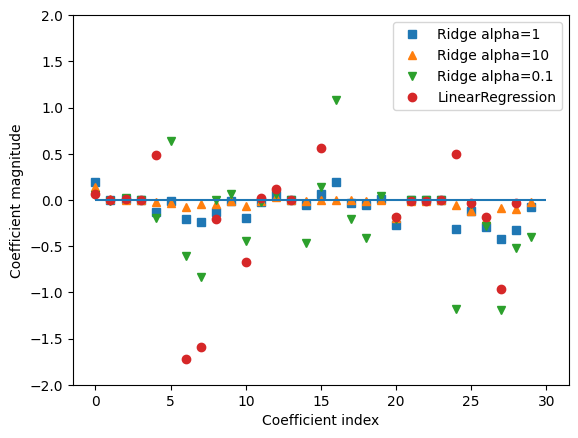

In [82]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-2, 2)
plt.legend()

- ##### For alpha=10 the coefficient are very much restricted and are constraint arount the -0.2 to 0.2 region
- ##### For alpha=1 we see the coefficients open up and start having a bigger range and start moving to the range of -0.3 to 0.3
- ##### For alpha=0.1 we see a significant increase in the magnitude of the coefficients they start exibiting a pattern that resembles linear regression

#### Visualizing the ridge regression algorithm at varying data sample sizes

In [88]:
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                   label="training "+estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
                   label="test "+estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)
def plot_ridge_n_samples():
    X, y = load_extended_boston()

    plot_learning_curve(Ridge(alpha=1), X, y)
    plot_learning_curve(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

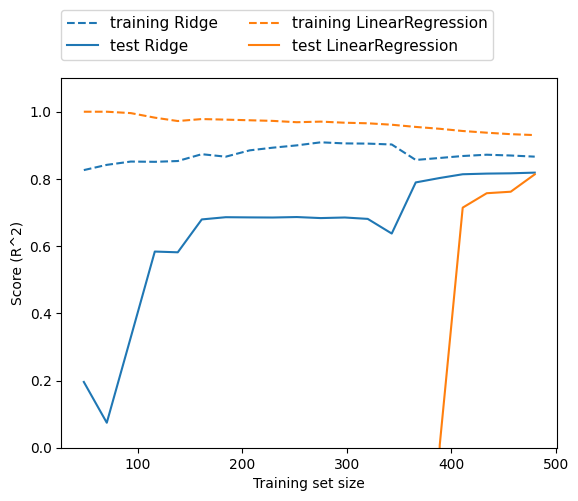

In [89]:
plot_ridge_n_samples()

- ##### the training score is higher than the test score for all dataset sizes
- ##### The training score of ridge is lower than the training score for linear regression because it is more genralized 
- ##### For less than 400 data points, linear regression is not able to learn anything
- ##### As more and more data becomes available, both models improve and linear regression catches up with ridge regression 

### Lasso

-  ##### Lasso an alternative for regularizing linear regression  
-  ##### The weights/coefficients are calculated by L1 generalization
-  ##### This means that bringing most values that are  as close as possible to zero are changed to zero so that they don't affect the model significantly

#### Applying the Lasso algorithm 

In [92]:
# Initializing the model to 3 neighbors
lasso = Lasso()

In [93]:
#Fitting the model with data
lasso.fit(X_train, y_train)

Lasso()

In [94]:
# Making predictions
print("Test set predictions: {}". format(lasso.predict(X_test)))

Test set predictions: [ 0.80082316  0.89229429  0.73840621  0.75934876  0.65792523  0.78089466
  0.75557768  0.85106241  0.586304    0.38733129  0.38564218  0.94153387
  0.11856965  0.79477753  0.75714427  0.58098876  0.65743055  0.81870834
  0.8232159   0.95618992  1.01832508  0.87881693  0.896617    0.64738647
  0.05054889  0.96068961  0.75136014  0.50408398  0.85658839 -0.88777352
 -0.4137507  -0.11416746  0.81444633 -0.47975663 -0.11395993  0.68860711
  0.37138631  0.85287585  0.86155623  0.50776591  0.83254627  0.2730378
  0.85437396  0.79892978  0.8974019   0.59639956  1.02499169  0.93364403
  0.51556684  1.00101237  0.81356182  0.25333208  0.62311657  0.79618695
  0.91154865  0.81049597  0.30004553  0.76180288  0.83147687  0.83507002
  0.3361044   0.88885355 -1.50154082  0.10300538  0.81209336  0.92838074
  0.87302461  0.88384525  0.53271393 -0.79767899  0.34214247  0.72849009
  0.96740886 -0.02080745  0.76069829  0.69437938  0.66880273  0.93349486
  0.91110276  0.78021769  0.70

In [101]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(lasso.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lasso.score(X_train, y_train)))
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))
print("Number of features not used: {}".format(np.sum(lasso.coef_==0)))

Test set R^2: 0.50
Training set R^2: 0.56
Number of features used: 2
Number of features not used: 28


-  ##### The Lasso does quite badly on the training and test set
-  ##### only 2 of the 30 features is used, this is an example of an underfitted model
-  ##### to reduce underfitting lets decrease the alpha

#### Visualizing the lasso algorithm 

In [102]:
# Initializing the model to 3 neighbors
lr = LinearRegression()

In [103]:
#Fitting the model with data
lr.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lr.score(X_train, y_train)))

Test set R^2: 0.67
Training set R^2: 0.79


In [104]:
# Initializing the model to 3 neighbors
lasso = Lasso().fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lasso.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lasso.score(X_train, y_train)))

Test set R^2: 0.50
Training set R^2: 0.56


In [113]:
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Number of features used: {}".format(np.sum(lasso001.coef_!=0)))
print("Number of features not used: {}".format(np.sum(lasso001.coef_==0)))

Test set R^2: 0.66
Training set R^2: 0.70
Number of features used: 8
Number of features not used: 22


-  ##### decreasing the alpha lessens the restriction on the coefficients
-  ##### this allows us to fit a more complex model with more features
-  ##### which increases the training and test scores

In [118]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_!=0)))
print("Number of features not used: {}".format(np.sum(lasso00001.coef_==0)))

Test set R^2: 0.72
Training set R^2: 0.77
Number of features used: 22
Number of features not used: 8


- ##### Decreasing the alpha even more allows us to use almost all the features
- ##### This then increases accuraccy but can also lead to overfitting

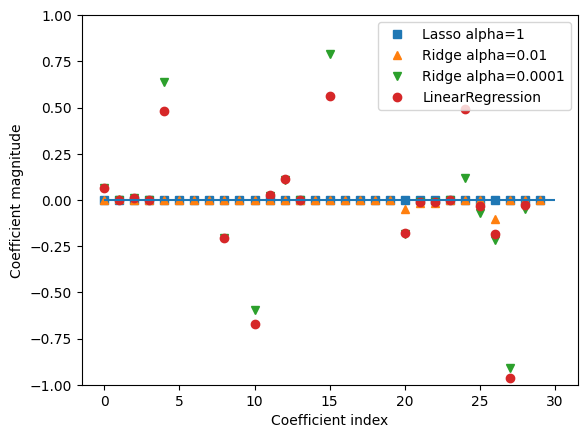

In [122]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Ridge alpha=0.01")
plt.plot(ridge00001.coef_, 'v', label="Ridge alpha=0.0001")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-1, 1)
plt.legend()

- ##### For alpha=1 the coefficient are very much restricted 
- ##### For alpha=0.01 we see the coefficients open up and start having a bigger
- ##### For alpha=0.0001 we see a significant increase in the magnitude of the coefficients they start exibiting a pattern that resembles linear regression

#### Visualizing the ridge regression algorithm at varying data sample sizes

In [130]:
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(2, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                   label="training "+estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
                   label="test "+estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)
def plot_lasso_n_samples():
    X, y = load_extended_boston()

    plot_learning_curve(Lasso(alpha=0.0001, max_iter=100000), X, y)
    plot_learning_curve(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

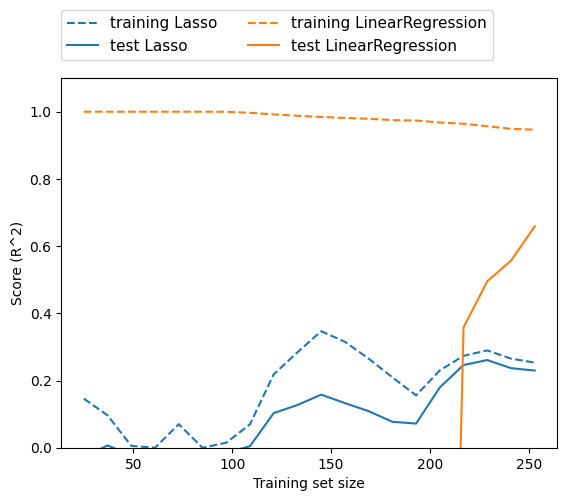

In [131]:
plot_ridge_n_samples()

- ##### the training score is higher than the test score for all dataset sizes
- ##### The training score of ridge is lower than the training score for linear regression because it is more genralized 
- ##### For less than 400 data points, linear regression is not able to learn anything
- ##### As more and more data becomes available, both models improve
